In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats #to use the built in norm.pdf method..
#the next 2 are for calculating area below the normal distribution
from numpy import trapz 
from scipy.integrate import simps
from matplotlib import pyplot as plt



# Introduction
- Not really any questions to answer in this Session No.2. We'll just go with the flow and play with the Normal Distribution a little bit.. 

- The plan I'm following here is that I'll plot the distribution using using its mathematical expression first, then we'll see what Python libraries have to offer to do that in a cleaner way...

From there, the idea is simply to go through the different types of question we can encounter (what's P(x>"***any-given-number***") type of questions...)

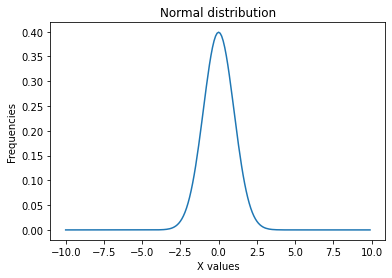

In [2]:
#[STEP-0]--------------------------------------------------------------------------------------------------------------
#create a numpy array with values (start, stop, step...)
#watch out: step argument not integer... it's going to mess up the values in X...
X = np.arange(start=-10, stop=10, step=0.1)
#parameters of the distribution
mu = 0
sigma = 1


#[STEP-1]--------------------------------------------------------------------------------------------------------------
#function to calculate the Y values of the X array using the mathematical expression of the "normal distribution"
def normalDistrib(X, Y, mu, sigma):
    for x in X:
        Y1=(1/np.sqrt(2*np.pi*np.square(sigma)))
        Y2= math.exp((-1/2)*np.square((x-mu)/sigma))  
        Y3 = Y1 * Y2
        Y.append(Y3)
    return Y


#[STEP-2]--------------------------------------------------------------------------------------------------------------
#Empty array (=a variable size) that'll store the return of the fucntion created above
Y = []
Y = normalDistrib(X, Y, mu, sigma)
Y


#[STEP-3]--------------------------------------------------------------------------------------------------------------
#Plot the curve
plt.plot(X, Y)
plt.title("Normal distribution")
plt.xlabel("X values")
plt.ylabel("Frequencies")
plt.show()

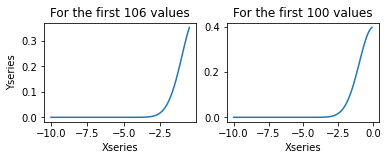

In [4]:
#Now that we have all the values to plot the ditribution (X/Y). let's start playing with it a little bit

#[STEP-0]--------------------------------------------------------------------------------------------------------------
# Simple probability calculations
# P(X<=0): the area below the curve that's before 0. It should be 0.5:

Xseries= pd.Series(X)
Yseries = pd.Series(Y)

#the np.arange method does not work very well... We need to round the result, then use interval cause return not consistent...
Xseries.round(1)
X_zero_index = Xseries[(Xseries.values>-0.1)&(Xseries.values<0.1)].head(1).index[0]


fig = plt.figure()
# the arguments of this stuff work as following: plt.subplot(nb_line, nb_columns, position)
plt.subplot(2, 2, 1)
plt.plot(Xseries.head(96), Yseries.head(96))
plt.title("For the first 106 values")
plt.xlabel("Xseries")
plt.ylabel("Yseries")
plt.subplot(2, 2, 2)
plt.plot(Xseries.head(100), Yseries.head(100))
plt.title("For the first 100 values")
plt.xlabel("Xseries")
plt.show()


Again, this whole first part is to play around with mathematical expressions, so I'm really not trying to be exactly perfect in terms of precision of the result... I'm going to take the right curve to calculate the area below the curve. It looks better (knowing that we want the area below the curves until x=0)

In [9]:
#These 2 methods are 2 different ways to calculate the area below a curve...
area = trapz(Yseries.head(100), Xseries.head(100))
area
print("using trapz: area =", area)
area = simps(Yseries.head(100), Xseries.head(100))
print("using simps: area =", area)


using trapz: area = 0.46020525860606387
using simps: area = 0.4601560098268842


Ok, so the algorith is going to be the same all the time... we get the index i of the X value we want, then we calculate the area below the first i values using both X and Y coordinates to get the probability... Let's do a couple more by creating a function that'll not only get the index of the X we want, but also calculate the area, since it's always the same thing...

In [10]:
#just for the sake of it I did 2 functions... but they both return approximately the same values...
def probabilityCalculusTrapz(X, Xseries, Yseries):
    X_index = Xseries[(Xseries.values>(X-0.1))&(Xseries.values<(X+0.1))].tail(1).index[0]
    area = trapz(Yseries.head(X_index), Xseries.head(X_index))
    return area

def probabilityCalculusSimps(X, Xseries, Yseries):
    X_index = Xseries[(Xseries.values>(X-0.1))&(Xseries.values<(X+0.1))].tail(1).index[0]
    area = simps(Yseries.head(X_index), Xseries.head(X_index))
    return area

A = probabilityCalculusTrapz(0, Xseries, Yseries)
B = probabilityCalculusSimps(0, Xseries, Yseries)
print(A)
print(B)


0.4999999999999859
0.4999999999999859


# First type of question: P(X<value)

- Now that we've made sure that the functions work properly (for the standard normal distribution...), let's deal with the first type of questions: those which, ask for the probability of x being below a certain value...
- We're essentially looking for this area:

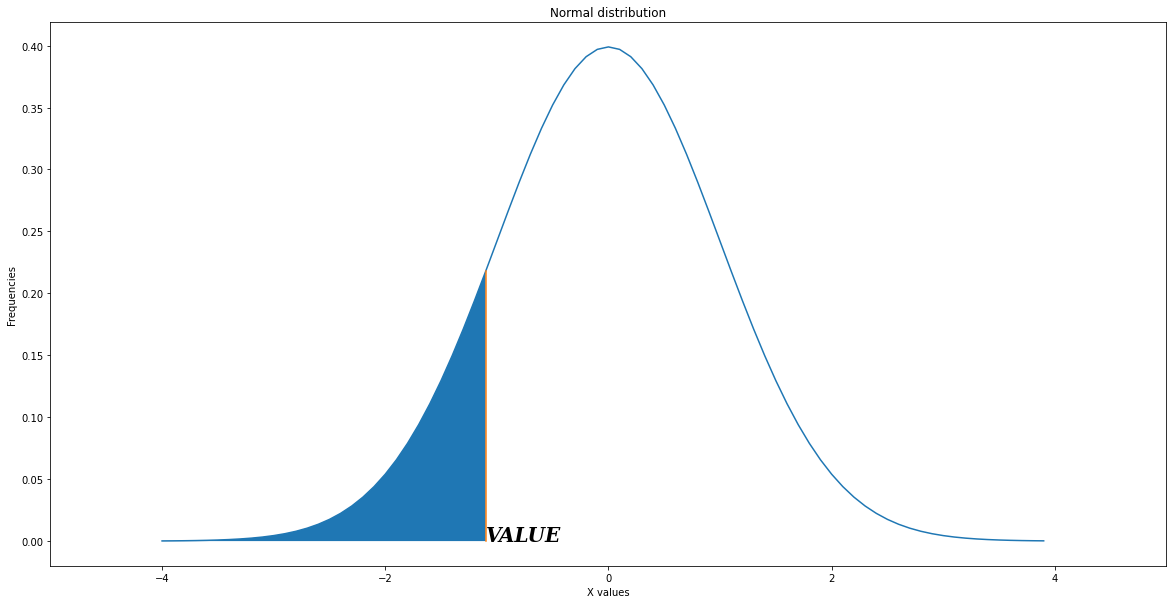

In [105]:
#cuve filled with
X = np.arange(start=-4, stop=4, step=0.1)
X = pd.Series(X)
mu = 0
sigma = 1
Y = []
Y = normalDistrib(X, Y, mu, sigma)
Y = pd.Series(Y)

X_index = X[(X.values>-1.1)&(X.values<-0.9)].tail(1).index[0]

#Plot the curve
plt.figure(figsize=(20,10))
plt.plot(X, Y)
plt.title("Normal distribution")
plt.xlabel("X values")
plt.ylabel("Frequencies")

#fill the area to calculate and add a text------
plt.fill_between(X.head(X_index),Y.head(X_index))
plt.text(X[X_index-1], 0, 'VALUE', style = 'italic',fontweight = 'bold', fontsize = 20, family = 'serif', rotation = 0)

#This is how you draw the straight line from the x axis to its y coordinate----
points = [(X[X_index-1], Y[X_index-1])] 
plt.xlim(-5,5)  # set up the plot limits
for pt in points:
    # plot (x,y) pairs.
    # vertical line: 2 x,y pairs: (a,0) and (a,b)
    plt.plot( [pt[0],pt[0]], [0,pt[1]] )


plt.show()


In [12]:
#Back to the questions type: P(X<value) 
#P(X<=0)
P1 = probabilityCalculusTrapz(0, Xseries, Yseries)
print("P1: "+str(P1))

#P(X<=0.8)
P2 = probabilityCalculusTrapz(0.8, Xseries, Yseries)
print("P2: "+str(P2))

#P(X<=1.64)
P3 = probabilityCalculusTrapz(1.64, Xseries, Yseries)
print("P3: "+str(P3))

# #P(X<=1.96)
P4 = probabilityCalculusTrapz(1.96, Xseries, Yseries)
print("P4: "+str(P4))

# P(X<=3)
P5 = probabilityCalculusTrapz(3, Xseries, Yseries)
print("P5: "+str(P5))


P1: 0.4999999999999859
P2: 0.7879513976820522
P3: 0.9450528030324161
P4: 0.9711795590729027
P5: 0.9986390334243085


# Second type of questions: P(X = Value)

- Here, based on what we've seen before, we can guess that we're looking for the Y coordinate of "***value***"
- for this type of question, we're simply going to use the expression of the normal distribution. I'll put it in a function...

### so the rule would be:  P(X = Value) = f(X)

In [14]:
def probabilityCalcQuestionsType2(X, mu, sigma):
    Y1=(1/np.sqrt(2*np.pi*np.square(sigma)))
    Y2= math.exp((-1/2)*np.square((X-mu)/sigma))  
    Y = Y1 * Y2
    return Y

X = 0
mu = 0
sigma = 1

Y  = probabilityCalcQuestionsType2(X, mu, sigma)
Y

0.3989422804014327

The function works fine (again, for the ***standard normal distribution only***), lets just do one or two calculus...

In [15]:
#P(X=1)
P5  = probabilityCalcQuestionsType2(1, mu, sigma)
print("P5: "+str(P5))
P5

# P(X<0)
P6 = probabilityCalculusTrapz(0, Xseries, Yseries)
print("P6: "+str(P6))
P6

P5: 0.24197072451914337
P6: 0.4999999999999859


0.4999999999999859

# Third type of questions: P(X>value)

- You get the idea, but know, we'll do the same as what we've done before, but for questions like what's the probability for X to be above a certain value... 
- Because I know how the normal distribution works, I'm not going to create any other function to calculate those probabilities: I'm just going to take 1-p(X<value), because of the complementarity stuff, and the fact that the entire area below the curve is supposed to be equal to 1 and stuff...

#### So the rule would be: P(X>value) = 1 - P(X<value)
- And we're looking for the area in blue:

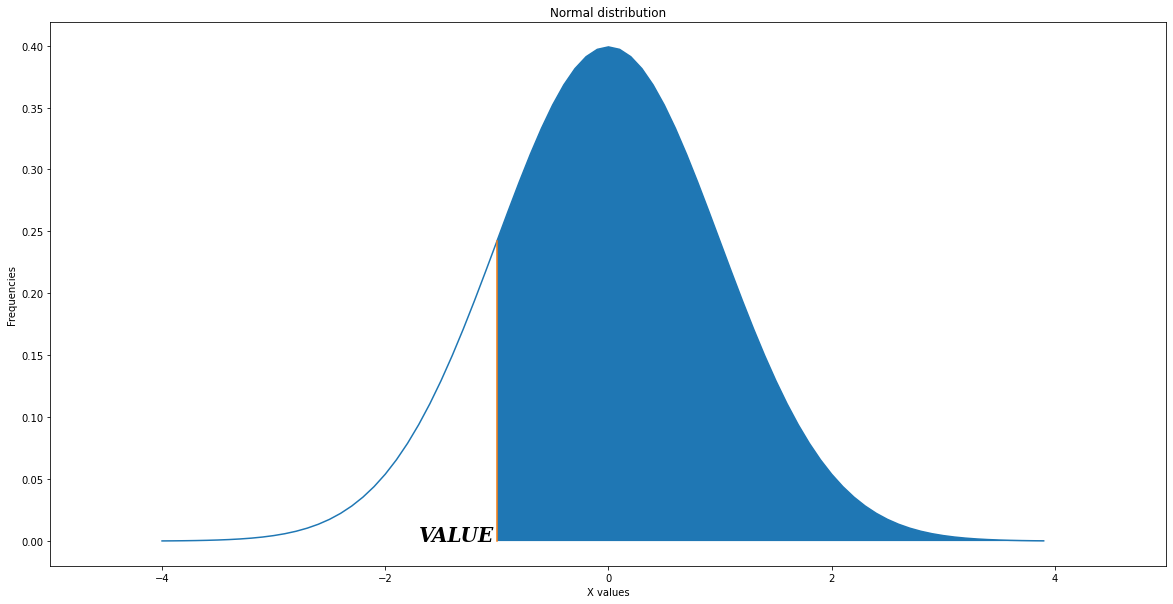

In [104]:
#cuve filled with
X = np.arange(start=-4, stop=4, step=0.1)
X = pd.Series(X)
mu = 0
sigma = 1
Y = []
Y = normalDistrib(X, Y, mu, sigma)
Y = pd.Series(Y)

X_index = X[(X.values>-1.1)&(X.values<-0.9)].tail(1).index[0]

#Plot the curve
plt.figure(figsize=(20,10))
plt.plot(X, Y)
plt.title("Normal distribution")
plt.xlabel("X values")
plt.ylabel("Frequencies")

#fill the area to calculate and add a text------

plt.fill_between(X[X_index:],Y[X_index:])
# plt.fill_between(X.head(X_index),Y.head(X_index))
plt.text(X[X_index-7], 0, 'VALUE', style = 'italic',fontweight = 'bold', fontsize = 20, family = 'serif', rotation = 0)

#This is how you draw the straight line from the x axis to its y coordinate----
points = [(X[X_index], Y[X_index])] 
plt.xlim(-5,5)  # set up the plot limits
for pt in points:
    # plot (x,y) pairs.
    # vertical line: 2 x,y pairs: (a,0) and (a,b)
    plt.plot( [pt[0],pt[0]], [0,pt[1]] )


plt.show()


# X.head(X_index)


In [108]:
#P(X>0)
P7  = probabilityCalculusTrapz(0, Xseries, Yseries)
P7= 1 - P7
P7

#P(X>1.64)
P8 = probabilityCalculusTrapz(1.64, Xseries, Yseries)
P8 = 1 - P8
P8

#P(X<2.1)
P9 = probabilityCalculusTrapz(2.1, Xseries, Yseries)
P9 =  P9
P9

#P(X<-2)
P10 = probabilityCalculusTrapz(-2, Xseries, Yseries)
P10

#P(X<1.5)
P11 = probabilityCalculusTrapz(1.5, Xseries, Yseries)
P11

0.933030881515148

# 4th type of question: P(value1< X < value2)

- like before, for this new type, no need to create any other function, the idea is just to understand how to manipulate the normal distribution... 

### so here, the rule's gonna be: P(value1< X < value2) = P(X < value2) - P(X < value1) 

- and we're looking for this area:


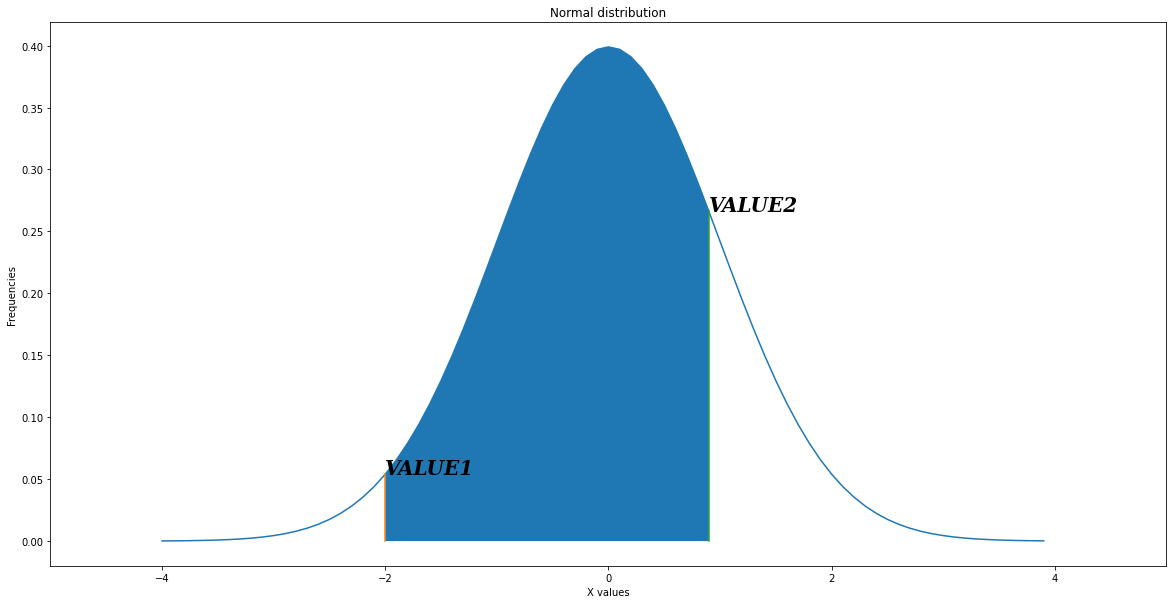

In [140]:
#cuve filled with
X = np.arange(start=-4, stop=4, step=0.1)
X = pd.Series(X)
mu = 0
sigma = 1
Y = []
Y = normalDistrib(X, Y, mu, sigma)
Y = pd.Series(Y)

X_index = X[(X.values>-1.1)&(X.values<-0.9)].tail(1).index[0]

value1 = -2
value2 = 1
intervalIndexes = X[(X.values>value1)&(X.values<value2)].index
intervalIndexes
Y.iloc[intervalIndexes]
X.iloc[intervalIndexes]

#Plot the curve
plt.figure(figsize=(20,10))
plt.plot(X, Y)
plt.title("Normal distribution")
plt.xlabel("X values")
plt.ylabel("Frequencies")

#fill the area to calculate and add a text------
plt.fill_between(X.iloc[intervalIndexes],Y.iloc[intervalIndexes])
plt.text(X.iloc[intervalIndexes].head(1), Y.iloc[intervalIndexes].head(1), 'VALUE1', style = 'italic',fontweight = 'bold', fontsize = 20, family = 'serif', rotation = 0)
plt.text(X.iloc[intervalIndexes].tail(1), Y.iloc[intervalIndexes].tail(1), 'VALUE2', style = 'italic',fontweight = 'bold', fontsize = 20, family = 'serif', rotation = 0)
# plt.text(X[X_index-1], Y[X_index-1], 'VALUE', style = 'italic',fontweight = 'bold', fontsize = 20, family = 'serif', rotation = 0)

plt.xlim(-5,5)  # set up the plot limits
#This is how you draw the straight line from the x axis to its y coordinate----
X_val = X.iloc[intervalIndexes].head(1)
Y_val = Y.iloc[intervalIndexes].head(1)
X_val = float(X_val)
Y_val = float(Y_val)
points = [(X_val, Y_val)] 
for pt in points:
    # plot (x,y) pairs.
    # vertical line: 2 x,y pairs: (a,0) and (a,b)
    plt.plot( [pt[0],pt[0]], [0,pt[1]] )
    
X_val2 = X.iloc[intervalIndexes].tail(1)
Y_val2 = Y.iloc[intervalIndexes].tail(1)
X_val2 = float(X_val2)
Y_val2 = float(Y_val2)
points = [(X_val2, Y_val2)] 
for pt in points:
    # plot (x,y) pairs.
    # vertical line: 2 x,y pairs: (a,0) and (a,b)
    plt.plot( [pt[0],pt[0]], [0,pt[1]] )


plt.show()



In [109]:
#P(-1.96< X < 1.96)
P12_1 = probabilityCalculusTrapz(-1.96, Xseries, Yseries)
P12_2 = probabilityCalculusTrapz(1.96, Xseries, Yseries)

P12 = P12_2 - P12_1
P12

#P(0.2< X < 1.5)
P13_1 = probabilityCalculusTrapz(0.2, Xseries, Yseries)
P13_2 = probabilityCalculusTrapz(1.5, Xseries, Yseries)

P13 = P13_2 - P13_1
P13

0.35383637804861656

# 5th type of question:
- q1: find the z value for P(X < z) = Value
- q2: find the z value for P(X > z) = Value
- q3: find the z values for P(-z <X < z) = Value

We're moving to a new kind of question here. we're not looking for probability values anymore, now we want the z value (in other words the abscisse value for a given probability...). 

Coding it in a function might be a little too complex to be relevant for this exercise. For now, I'll stick with explaining how to calculate this: Here's how to answer this kind of question (with the standard normal distribution)
- q1: You essentially need to go in the z-table to find the closest z-score for the given probability.
- q2: go in the z-table to find the closest z-score for -value. Then just take the opposite of the z-score you'll find, and you're good...
- q3: the key information here, is that z and -z are opposite values... so let's say you look up value/2 in the z-table, you'll get z... and -z.

# Using Python built in functions

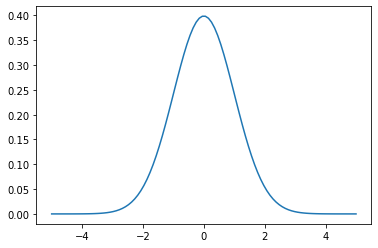

In [143]:
#Use the filling function to identify the 2 areas of the critical region
mu = 0
variance = np.square(1)
sigma = math.sqrt(variance)

# We'll plot between [mu-5*sigma ; mu+5*sigma]
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()